### Importing libraries and packages

In [219]:
# Import libraries for our task
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn import metrics 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import itertools
import mlflow
import pickle


In [220]:
# Import system libraries and our Scripts

import os
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../script')))

In [221]:
# Read AdSmart_AB_testing_data 

clean_df  = pd.read_csv('../data/clean_data.csv')

In [222]:
# The types and shape of data features in the dataset

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1243 non-null   int64 
 1   auction_id   1243 non-null   object
 2   experiment   1243 non-null   object
 3   date         1243 non-null   object
 4   hour         1243 non-null   int64 
 5   device_make  1243 non-null   object
 6   platform_os  1243 non-null   int64 
 7   browser      1243 non-null   object
 8   aware        1243 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 87.5+ KB


In [223]:
# change categorical variables to numerical value
lb = LabelEncoder()
clean_df['experiment'] = lb.fit_transform(clean_df['experiment'])
clean_df['browser'] = lb.fit_transform(clean_df['browser'])
clean_df['device_make'] = lb.fit_transform(clean_df['device_make'])
clean_df['date'] = lb.fit_transform(clean_df['date'])
clean_df['aware'] = lb.fit_transform(clean_df['aware'])


Model training 

In [224]:
# feature_cols = ["experiment", "hour", "date", 'device_make', "platform_os",  "browser"]
feature_cols = ["experiment", "hour", "date", 'device_make', 'browser']

X = clean_df[feature_cols]
y = clean_df[['aware']]

test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [225]:
# Define Random Forest Model
rf = RandomForestClassifier(n_estimators=100)

# We fit our model with our train data
rf.fit(X_train, y_train)

# Then predict results from X_test data
pred_rf = rf.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_rf[0:10])
print("Actual:", y_test[0:10])

2022/05/21 15:33:43 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


Predicted: [1 1 0 0 1 0 1 1 0 0]
Actual:       aware
900       1
1003      0
671       0
620       0
926       1
997       0
745       1
938       1
451       0
439       1


In [226]:
# Define Decision Tree Model
dt = DecisionTreeClassifier()
# We fit our model with our train data
dt.fit(X_train, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_dt[0:10])
print("Actual:", y_test[0:10])

2022/05/21 15:33:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


Predicted: [1 0 0 0 1 0 1 1 1 0]
Actual:       aware
900       1
1003      0
671       0
620       0
926       1
997       0
745       1
938       1
451       0
439       1


In [227]:
# Define Logistic Regression Model
log = LogisticRegression()
# We fit our model with our train data
log.fit(X_train, y_train)
# Then predict results from X_test data
pred_log = log.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_log[0:10])
print("Actual:", y_test[0:10])

2022/05/21 15:33:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


Predicted: [0 1 0 0 1 0 1 0 0 0]
Actual:       aware
900       1
1003      0
671       0
620       0
926       1
997       0
745       1
938       1
451       0
439       1


In [228]:
# Define Bernouilli Naive Bias Model
bnb = BernoulliNB()
# We fit our model with our train data
bnb.fit(X_train, y_train)
# Then predict results from X_test data
pred_bnb = bnb.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_bnb[0:10])
print("Actual:", y_test[0:10])

2022/05/21 15:33:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


Predicted: [0 0 0 0 0 0 0 0 0 0]
Actual:       aware
900       1
1003      0
671       0
620       0
926       1
997       0
745       1
938       1
451       0
439       1


In [229]:
# Define Gaussian Naive Bias Model
gnb = GaussianNB()
# We fit our model with our train data
gnb.fit(X_train, y_train)
# Then predict results from X_test data
pred_gnb = gnb.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_gnb[0:10])
print("Actual:", y_test[0:10])

2022/05/21 15:33:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


Predicted: [0 1 0 0 1 0 1 1 0 0]
Actual:       aware
900       1
1003      0
671       0
620       0
926       1
997       0
745       1
938       1
451       0
439       1


In [230]:
# Define KNN Model
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
# We fit our model with our train data
knn.fit(X_train, y_train)
# Then predict results from X_test data
pred_knn = knn.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_knn[0:10])
print("Actual:", y_test[0:10])

2022/05/21 15:33:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


Predicted: [1 0 0 0 1 0 1 0 1 0]
Actual:       aware
900       1
1003      0
671       0
620       0
926       1
997       0
745       1
938       1
451       0
439       1


In [231]:
# Define XGBoost Model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# We fit our model with our train data
xgb.fit(
    X_train, y_train,
    # That means if model don't improve it self in 5 rounds, it will stop learning
    # So you can save your time and don't overtrain your model.
    early_stopping_rounds=5,
    # We provide Test data's to evaluate model performance
    eval_set=[(X_test, y_test)],
    verbose=False
 )
# Then predict results from X_test data
pred_xgb = xgb.predict(X_test)

# See First 10 Predictions and They Actual Values
# print("Predicted:", pred_xgb[0:10])
print("Actual:", y_test[0:10])

2022/05/21 15:33:44 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during xgboost autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


Actual:       aware
900       1
1003      0
671       0
620       0
926       1
997       0
745       1
938       1
451       0
439       1


In [232]:
# Confusion Matrixes
# First parameter is actual value
# second parameter is value that we prediceted
# Random Forest 
cm_rf = confusion_matrix(y_test, pred_rf)
# Desicion Tree
cm_dt = confusion_matrix(y_test, pred_dt)
# Logistic Regression
cm_log = confusion_matrix(y_test, pred_log)
# Bernouilli Naive Bias
cm_bnb = confusion_matrix(y_test, pred_bnb)
# Gaussian Naive Bias
cm_gnb = confusion_matrix(y_test, pred_gnb)
# KNN (K-Nearest Neighbors)
cm_knn = confusion_matrix(y_test, pred_knn)
# XGBoost 
cm_xgb = confusion_matrix(y_test, pred_xgb)

print("***********************")
print("Confusion Matrixes")
print("***********************")
print("Random Forest:\n", cm_rf)
print("Desicion Tree:\n", cm_dt)
print("Logistic Regression:\n", cm_log)
print("Bernouilli Naive Bias:\n", cm_bnb)
print("Gaussian Naive Bias:\n", cm_gnb)
print("KNN (K-Nearest Neighbors):\n", cm_knn)
print("XGBoost:\n", cm_xgb)

***********************
Confusion Matrixes
***********************
Random Forest:
 [[44 21]
 [33 27]]
Desicion Tree:
 [[42 23]
 [35 25]]
Logistic Regression:
 [[58  7]
 [47 13]]
Bernouilli Naive Bias:
 [[65  0]
 [60  0]]
Gaussian Naive Bias:
 [[57  8]
 [48 12]]
KNN (K-Nearest Neighbors):
 [[44 21]
 [39 21]]
XGBoost:
 [[51 14]
 [41 19]]


In [233]:
# Accuracy Scores
# First parameter is actual value
# second parameter is value that we prediceted

# Random Forest 
acc_rf = accuracy_score(y_test, pred_rf)
# Desicion Tree
acc_dt = accuracy_score(y_test, pred_dt)
# Logistic Regression
acc_log = accuracy_score(y_test, pred_log)
# Bernouilli Naive Bias
acc_bnb = accuracy_score(y_test, pred_bnb)
# Gaussian Naive Bias
acc_gnb = accuracy_score(y_test, pred_gnb)
# KNN (K-Nearest Neighbors)
acc_knn = accuracy_score(y_test, pred_knn)
# XGBoost 
acc_xgb = accuracy_score(y_test, pred_xgb)

print("***********************")
print("Accuracy Scores")
print("***********************")
print("Random Forest:", acc_rf)
print("Desicion Tree:", acc_dt)
print("Logistic Regression:", acc_log)
print("Bernouilli Naive Bias:", acc_bnb)
print("Gaussian Naive Bias:", acc_gnb)
print("KNN (K-Nearest Neighbors):", acc_knn)
print("XGBoost:", acc_xgb)

***********************
Accuracy Scores
***********************
Random Forest: 0.568
Desicion Tree: 0.536
Logistic Regression: 0.568
Bernouilli Naive Bias: 0.52
Gaussian Naive Bias: 0.552
KNN (K-Nearest Neighbors): 0.52
XGBoost: 0.56


### SKlearn pipeline

In [234]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
         plt.tight_layout()
         plt.ylabel('True label')
         plt.xlabel('Predicted label')

In [235]:
pipelin=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [236]:
pipedes=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [237]:
piperan=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [238]:
pipeber=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',BernoulliNB())])

In [239]:
pipexgb=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',XGBClassifier())])

In [240]:
pipekn=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',KNeighborsClassifier())])

In [241]:
pipexg=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',XGBClassifier())])

In [242]:
## LEts make the list of pipelines
pipelines = [pipelin, pipedes, piperan,pipeber,pipexgb,pipekn,pipexg]

In [ ]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {
				0: 'Logistic Regression', 
				1: 'Decision Tree', 
				2: 'RandomForest',
				3:'Bernouilli Naive Bias',
				4:'Gaussian Naive Bias',
				5:'KNN',
				6:'XGBoost'
			}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [244]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.52
Decision Tree Test Accuracy: 0.536
RandomForest Test Accuracy: 0.512
Bernouilli Naive Bias Test Accuracy: 0.52
Gaussian Naive Bias Test Accuracy: 0.544
KNN Test Accuracy: 0.568
XGBoost Test Accuracy: 0.544


In [245]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [246]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
    
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:KNN


In [247]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

2022/05/21 15:33:46 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


In [248]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.568


2022/05/21 15:33:46 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


accuracy: 56.8%
Confusion matrix, without normalization


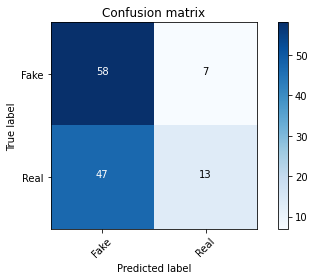

In [249]:
pipe = Pipeline([('model', LogisticRegression(random_state=0))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

2022/05/21 15:33:47 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


accuracy: 53.6%
Confusion matrix, without normalization


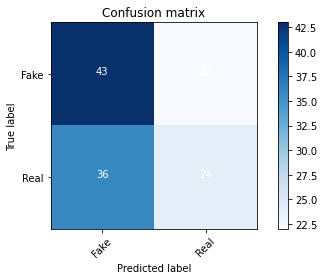

In [250]:
pipe = Pipeline([('model', RandomForestClassifier())])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

2022/05/21 15:33:47 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


accuracy: 53.6%
Confusion matrix, without normalization


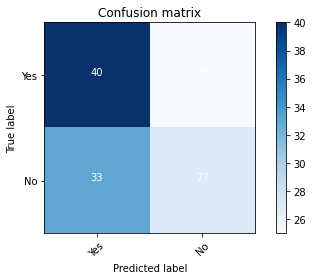

In [251]:
pipe = Pipeline([('model', DecisionTreeClassifier())])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Yes', 'No'])

2022/05/21 15:33:47 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


accuracy: 52.0%
Confusion matrix, without normalization


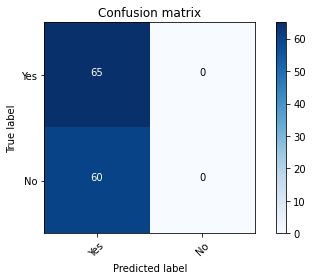

In [252]:
pipe = Pipeline([('model', BernoulliNB())])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Yes', 'No'])

2022/05/21 15:33:48 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


accuracy: 55.2%
Confusion matrix, without normalization


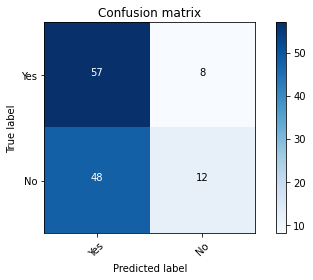

In [253]:
pipe = Pipeline([('model', GaussianNB())])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Yes', 'No'])

2022/05/21 15:33:48 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


accuracy: 59.2%
Confusion matrix, without normalization


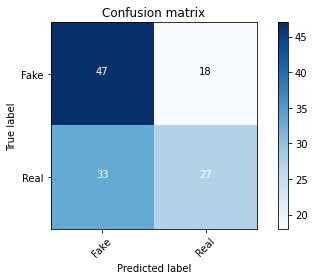

In [254]:
pipe = Pipeline([('model', XGBClassifier())])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

2022/05/21 15:33:48 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Invalid parent directory 'C:\Users\Sebli\Desktop\10x Files\Endework\SmartAd-Performance-Analysis\notebooks\mlruns\.trash'


accuracy: 52.0%
Confusion matrix, without normalization


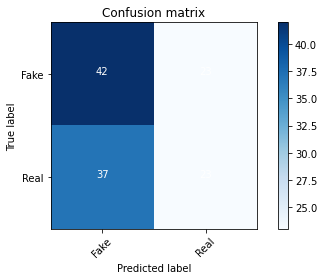

In [255]:
pipe = Pipeline([('model', KNeighborsClassifier())])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

<BarContainer object of 5 artists>

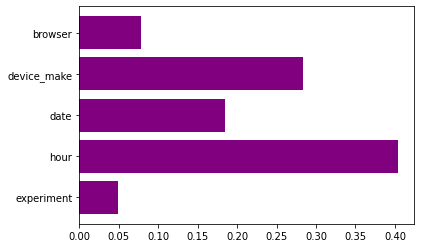

In [256]:
plt.barh(feature_cols, rf.feature_importances_,color='purple')

Based on the feature importance calculation of our ml model we can conclude that device make and hour has a vital role on brand awareness


Separating data in two platform and browser datasets

In [257]:
mlflow.autolog()

brw = clean_df[["experiment", "hour", "date", 'device_make', 'browser', 'aware']]

data1=brw.to_csv("../data/brw.csv")  
plat = clean_df[["experiment", "hour", "date", 'device_make', 'platform_os', 'aware']]


2022/05/21 15:33:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2022/05/21 15:33:49 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.


The datasets of browser and platform  are saved as version two and version three respectively on dvc

In [258]:
#trainig the browser dataset
x=brw[["experiment", "hour", "date", "device_make", "browser"]]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x, brw.aware,test_size=0.3,random_state=45)

In [ ]:
#calling the algorithems to check their respective performace
rf = RandomForestRegressor(n_estimators = 100, max_depth = 6, max_features = 3)
rf.fit(X_train, y_train)

# Use the model to make predictions on the test dataset.
predictions = rf.predict(X_test)
autolog_run = mlflow.last_active_run()
sk_model=rf
sk_path_dir_2 = r'C:\Users\ende\Desktop\abtest-mlops\models'
mlflow.sklearn.save_model(sk_model,sk_path_dir_2,serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_CLOUDPICKLE)

In [ ]:
#calling the logistic to check their respective performace
lg = LogisticRegression()
rf.fit(X_train, y_train)

# Use the model to make predictions on the test dataset.
predictions = lg.predict(X_test)
autolog_run = mlflow.last_active_run()
sk_model=rf
sk_path_dir_2 = r'C:\Users\ende\Desktop\abtest-mlops\models'
mlflow.sklearn.save_model(sk_model,sk_path_dir_2,serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_CLOUDPICKLE)

In [ ]:
#calling the logistic to check their respective performace
kn = KNeighborsClassifier()
rf.fit(X_train, y_train)

# Use the model to make predictions on the test dataset.
predictions = kn.predict(X_test)
autolog_run = mlflow.last_active_run()
sk_model=rf
sk_path_dir_2 = r'C:\Users\ende\Desktop\abtest-mlops\models'
mlflow.sklearn.save_model(sk_model,sk_path_dir_2,serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_CLOUDPICKLE)

In [ ]:
#saving the best perfomer model
modelpath = "/dbfs/my_project_models/model-%f-%f" % (alpha, l1_ratio)
mlflow.sklearn.save_model(lr, modelpath)

In [ ]:
#trainig the platform dataset
x=plt[["experiment", "hour", "date", "device_make", "platform_os"]]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x, plt.aware,test_size=0.3,random_state=45)

In [ ]:
#calling the algorithems to check their respective performace
rf = RandomForestRegressor(n_estimators = 100, max_depth = 6, max_features = 3)
rf.fit(X_train, y_train)

# Use the model to make predictions on the test dataset.
predictions = rf.predict(X_test)
autolog_run = mlflow.last_active_run()
sk_model=rf
sk_path_dir_2 = r'C:\Users\ende\Desktop\abtest-mlops\models'
mlflow.sklearn.save_model(sk_model,sk_path_dir_2,serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_CLOUDPICKLE)

In [ ]:
#calling the logistic to check their respective performace
lg = LogisticRegression()
rf.fit(X_train, y_train)

# Use the model to make predictions on the test dataset.
predictions = lg.predict(X_test)
autolog_run = mlflow.last_active_run()
sk_model=rf
sk_path_dir_2 = r'C:\Users\ende\Desktop\abtest-mlops\models'
mlflow.sklearn.save_model(sk_model,sk_path_dir_2,serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_CLOUDPICKLE)


In [ ]:
#calling the logistic to check their respective performace
kn = KNeighborsClassifier()
rf.fit(X_train, y_train)

# Use the model to make predictions on the test dataset.
predictions = kn.predict(X_test)
autolog_run = mlflow.last_active_run()
sk_model=rf
sk_path_dir_2 = r'C:\Users\ende\Desktop\abtest-mlops\models'
mlflow.sklearn.save_model(sk_model,sk_path_dir_2,serialization_format=mlflow.sklearn.SERIALIZATION_FORMAT_CLOUDPICKLE)

In [ ]:
#saving the best perfomer model
modelpath = "/dbfs/my_project_models/model-%f-%f" % (alpha, l1_ratio)
mlflow.sklearn.save_model(lr, modelpath)